In [2]:
import os
import re
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
files_present = os.listdir()
files_present

['BaselineTensorboardPlots.ipynb',
 'run_baseline-tag-train_F1.csv',
 'run_baseline-tag-QAModel_loss_loss.csv',
 'run_baseline-tag-QAModel_loss_loss_end.csv',
 'run_baseline-tag-train_EM.csv',
 'run_baseline-tag-dev_loss.csv',
 'run_baseline-tag-dev_F1.csv',
 'run_baseline-tag-QAModel_loss_loss_start.csv',
 '.ipynb_checkpoints',
 'run_baseline-tag-dev_EM.csv']

In [4]:
runs = {f:{} for f in files_present if f.endswith('.csv')}

for r in runs.keys():
    runs[r]['title']  = r[r.find('run_')+4:r.find('-tag')]
    runs[r]['x_label']  = 'Steps'
    runs[r]['y_label']  = r[r.find('-tag-')+5:r.find('.csv')]
    runs[r]['data']  = np.genfromtxt(r, delimiter=',',skip_header = 1) 

print(runs)

{'run_baseline-tag-train_F1.csv': {'title': 'baseline', 'x_label': 'Steps', 'data': array([[  1.51857827e+09,   5.00000000e+02,   2.51640588e-01],
       [  1.51857901e+09,   1.00000000e+03,   2.92584151e-01],
       [  1.51857975e+09,   1.50000000e+03,   3.11331928e-01],
       [  1.51858049e+09,   2.00000000e+03,   3.42556298e-01],
       [  1.51858123e+09,   2.50000000e+03,   3.45696479e-01],
       [  1.51858196e+09,   3.00000000e+03,   4.00331020e-01],
       [  1.51858269e+09,   3.50000000e+03,   4.46678668e-01],
       [  1.51858342e+09,   4.00000000e+03,   3.96100521e-01],
       [  1.51858416e+09,   4.50000000e+03,   4.36847687e-01],
       [  1.51858489e+09,   5.00000000e+03,   4.48891371e-01],
       [  1.51858562e+09,   5.50000000e+03,   4.96425569e-01],
       [  1.51858635e+09,   6.00000000e+03,   4.60964859e-01],
       [  1.51858708e+09,   6.50000000e+03,   4.66089487e-01],
       [  1.51858781e+09,   7.00000000e+03,   4.82923597e-01],
       [  1.51858854e+09,   7.5000

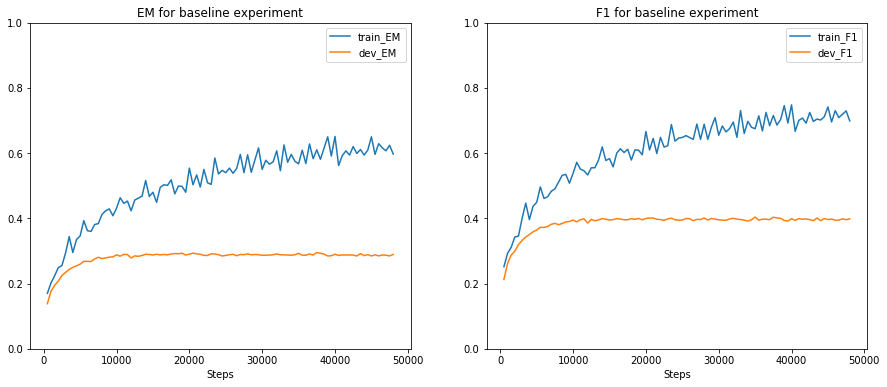

In [45]:
titles = ['EM', 'F1']
plt.figure(figsize=(15,6))
i = 1
for t in titles:
    titlestring = None
    plt.subplot(100+len(titles)*10+i)
    
    for r in runs.keys():
        if r.find(t) != -1:
            if titlestring == None:
                titlestring = ' for ' + runs[r]['title'] + ' experiment'
                plt.title(t +titlestring)
            plt.plot(runs[r]['data'][:,1],runs[r]['data'][:,2],label=runs[r]['y_label'])
            plt.xlabel('Steps')
            plt.legend()
            plt.ylim([0,1.0])
    i+=1

#Save the figure
figurename =''.join(titles) + titlestring.lower().replace(' ','-') + '.png'
plt.savefig(figurename, dpi =200)

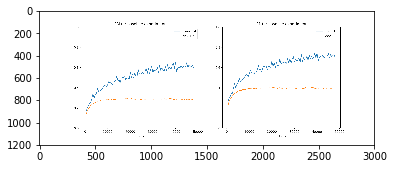

In [46]:
plt.imshow(plt.imread(figurename))